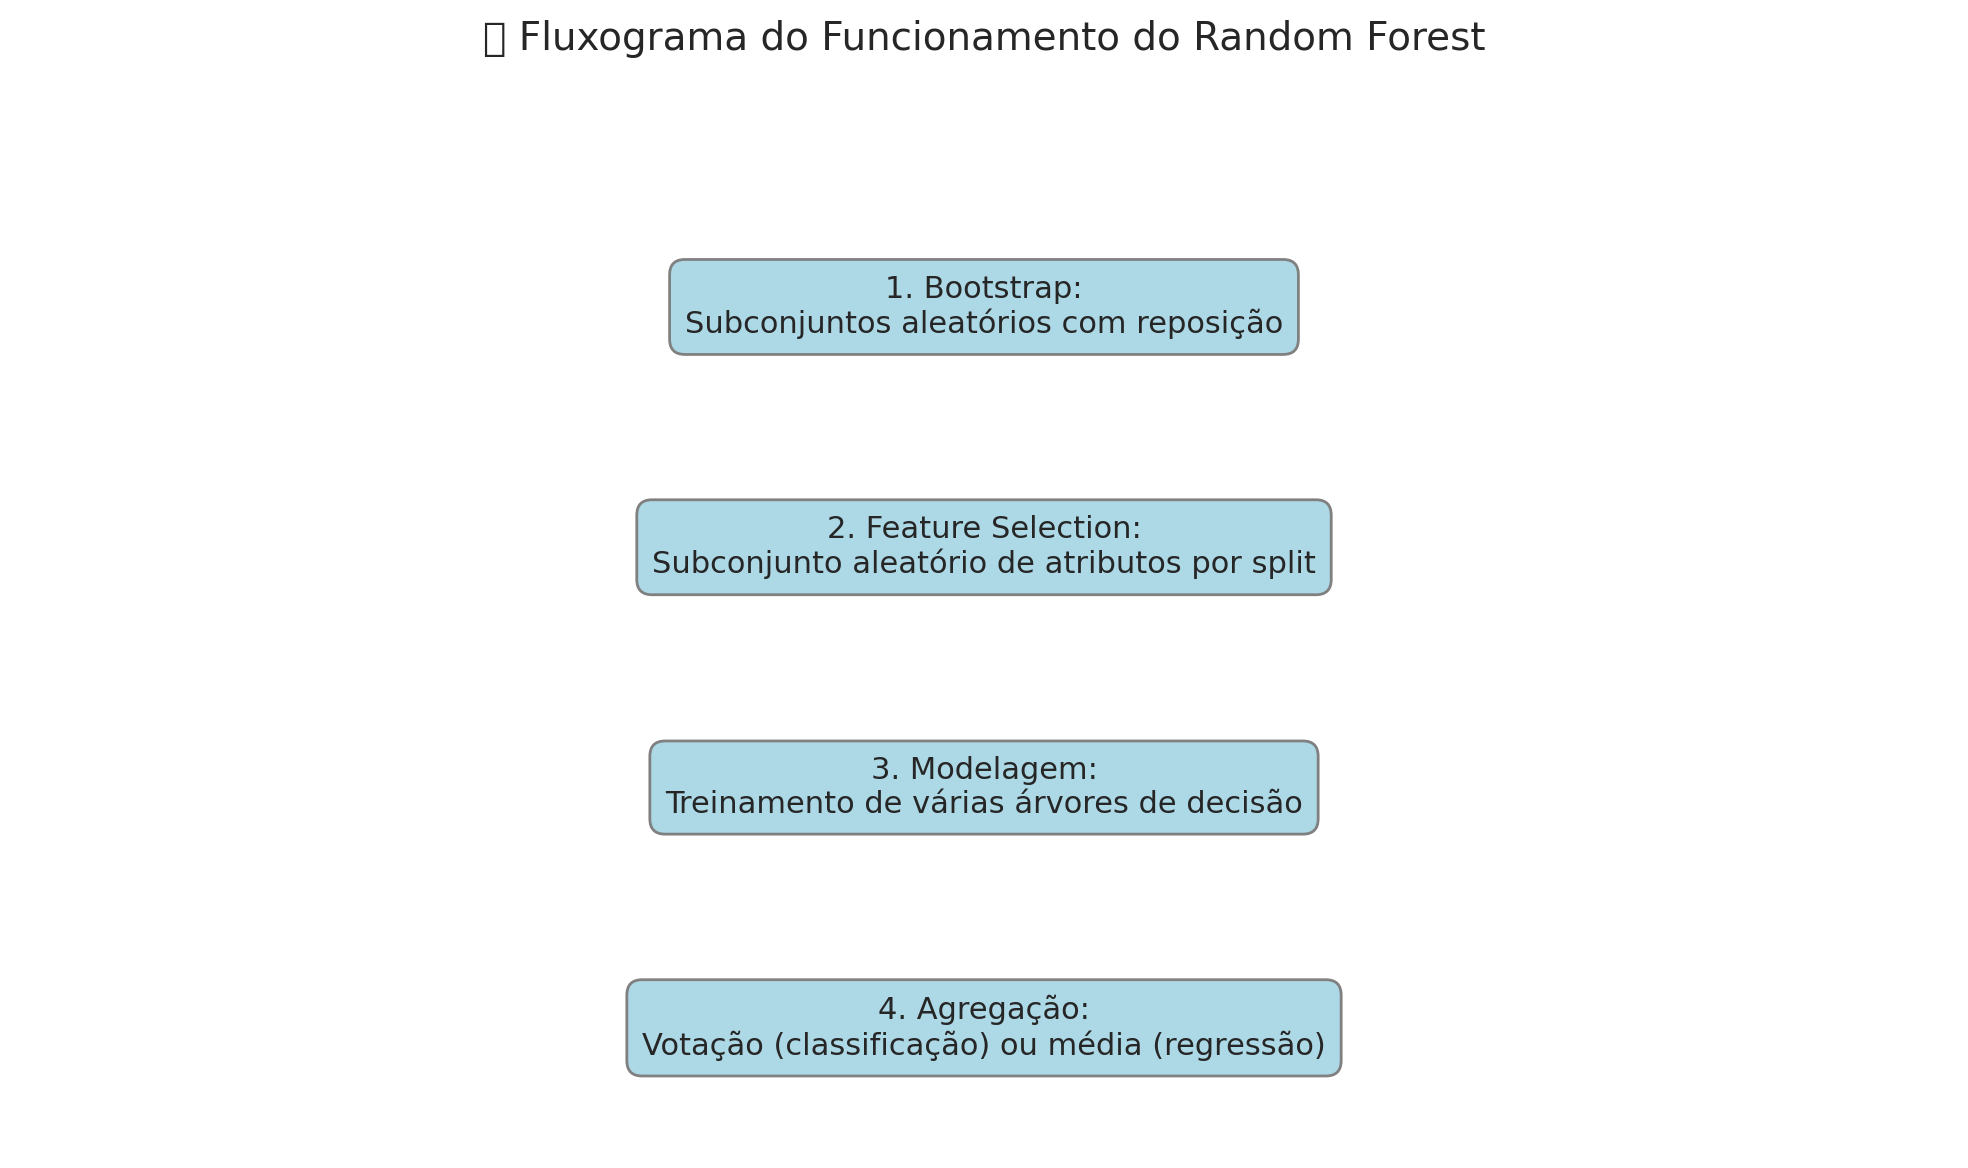

##  Random Forest — Passo a passo, explicação e implementação

---

### 1.  Passo a passo para o algoritmo Random Forest

1. **Bootstrapping**: 
   - Gere `n_estimators` subconjuntos aleatórios do conjunto de treinamento **com reposição** (igual ao Bagging).

2. **Seleção aleatória de atributos (Feature Subsampling)**:
   - Para cada divisão (nó) da árvore, selecione **aleatoriamente um subconjunto de atributos (features)** em vez de usar todos.
   - Isso adiciona diversidade entre as árvores.

3. **Modelagem**:
   - Para cada subconjunto de dados, **treine uma árvore de decisão** (geralmente sem poda), com splits baseados no subconjunto aleatório de features.

4. **Agregação**:
   - Para **classificação**: a classe mais votada entre as árvores (hard voting).
   - Para **regressão**: média das previsões numéricas (soft voting).

---

### 2.  O que é o Random Forest?

**Random Forest** é uma técnica de *ensemble learning* baseada em árvores de decisão. Ela combina os princípios do **Bagging** com um toque adicional de aleatoriedade:

> **Além de usar subconjuntos aleatórios dos dados (com reposição)**, o Random Forest também **seleciona aleatoriamente um subconjunto de atributos** em cada divisão de cada árvore.

Isso gera uma **"floresta" de árvores de decisão pouco correlacionadas**, o que:
- Reduz o risco de overfitting
- Melhora a generalização
- Torna o modelo mais estável

Em essência, é como consultar especialistas diferentes, cada um considerando dados e critérios levemente distintos, e tomar a decisão com base no consenso do grupo.

---

### 3.  Diferença entre Bagging e Random Forest

| Aspecto               | Bagging                                | Random Forest                                                                 |
|----------------------|-----------------------------------------|--------------------------------------------------------------------------------|
| **Base**             | Várias árvores de decisão               | Várias árvores de decisão                                                     |
| **Amostragem**       | Com reposição (bootstrap)               | Com reposição (bootstrap)                                                    |
| **Features**         | Usa **todas** as features em cada split | Usa um **subconjunto aleatório** de features em cada split                    |
| **Objetivo extra**   | Reduz variância                         | Reduz variância **e** decorrelaciona árvores                                  |
| **Performance**      | Menos robusto a variáveis redundantes   | Mais robusto em datasets com muitas variáveis correlacionadas                 |

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dataset de exemplo
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,         # Número de árvores
    max_features='sqrt',      # Subconjunto de features (sqrt para classificação)
    bootstrap=True,           # Amostragem com reposição
    random_state=42
)

# Treinamento e avaliação
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Acurácia (Random Forest):", accuracy_score(y_test, y_pred))

Acurácia (Random Forest): 1.0
